In [1]:
import mhcflurry
import numpy
import seaborn
import logging
from matplotlib import pyplot

% matplotlib inline
logging.basicConfig(level="DEBUG")


Using Theano backend.
/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Making predictions
Note: if you haven't already, run `mhcflurry-downloads fetch` in a shell to download the trained models.

## Simplest way to run predictions: `mhcflurry.predict()`

In [2]:
help(mhcflurry.predict)

Help on function predict in module mhcflurry.predict:

predict(alleles, peptides, predictor=None)
    Make predictions across all combinations of the specified alleles and
    peptides.
    
    Parameters
    ----------
    alleles : list of str
        Names of alleles to make predictions for.
    
    peptides : list of str
        Peptide amino acid sequences.
    
    predictor : Predictor to use. Defaults to downloaded Class1SingleModelMultiAllelePredictor.
    
    Returns DataFrame with columns "Allele", "Peptide", and "Prediction"



In [3]:
mhcflurry.predict(alleles=["HLA-A0201"], peptides=["SIINFEKL", "SIINFEQL"])

,Allele,Peptide,Prediction
0,HLA-A0201,SIINFEKL,10672.347656
1,HLA-A0201,SIINFEQL,7828.974121


## Instantiating a model

In [4]:
model = mhcflurry.class1_allele_specific.class1_single_model_multi_allele_predictor.from_allele_name("HLA-A0201")
model.predict(["SIINFEKL", "SIQNPEKP", "SYNFPEPI"])


array([ 10672.34765625,  30577.02539062,  10565.78222656], dtype=float32)

## Instantiating a model from a custom set of models on disk

In [5]:
models_dir = mhcflurry.downloads.get_path("models_class1_allele_specific_single")
models_dir

'/Users/tim/Library/Application Support/mhcflurry/4/0.1.0/models_class1_allele_specific_single/'

In [6]:
# Make a Loader first
loader = mhcflurry.Class1SingleModelMultiAllelePredictor.load_from_download_directory(
    models_dir)
model = loader.predictor_for_allele("HLA-A0201")
model.predict(["SIINFEKL", "SIQNPEKP", "SYNFPEPI"])

array([ 10672.34765625,  30577.02539062,  10565.78222656], dtype=float32)

# Loading a `Dataset`

In [7]:
full_training_data = mhcflurry.AffinityMeasurementDataset.from_csv(
    mhcflurry.downloads.get_path("data_combined_iedb_kim2014", "combined_human_class1_dataset.csv"))
full_training_data

AffinityMeasurementDataset(n=192550, alleles=['ELA-A1', 'Gogo-B0101', 'H-2-DB', 'H-2-DD', 'H-2-KB', 'H-2-KBM8', 'H-2-KD', 'H-2-KK', 'H-2-LD', 'H-2-LQ', 'HLA-A0101', 'HLA-A0201', 'HLA-A0202', 'HLA-A0203', 'HLA-A0204', 'HLA-A0205', 'HLA-A0206', 'HLA-A0207', 'HLA-A0210', 'HLA-A0211', 'HLA-A0212', 'HLA-A0216', 'HLA-A0217', 'HLA-A0219', 'HLA-A0250', 'HLA-A0301', 'HLA-A0302', 'HLA-A0319', 'HLA-A1', 'HLA-A11', 'HLA-A1101', 'HLA-A1102', 'HLA-A2', 'HLA-A2301', 'HLA-A24', 'HLA-A2402', 'HLA-A2403', 'HLA-A2501', 'HLA-A26', 'HLA-A2601', 'HLA-A2602', 'HLA-A2603', 'HLA-A2902', 'HLA-A3', 'HLA-A3/11', 'HLA-A3001', 'HLA-A3002', 'HLA-A3101', 'HLA-A3201', 'HLA-A3207', 'HLA-A3215', 'HLA-A3301', 'HLA-A6601', 'HLA-A6801', 'HLA-A6802', 'HLA-A6823', 'HLA-A6901', 'HLA-A7401', 'HLA-A8001', 'HLA-B0702', 'HLA-B0801', 'HLA-B0802', 'HLA-B0803', 'HLA-B1401', 'HLA-B1402', 'HLA-B1501', 'HLA-B1502', 'HLA-B1503', 'HLA-B1509', 'HLA-B1517', 'HLA-B1542', 'HLA-B1801', 'HLA-B27', 'HLA-B2701', 'HLA-B2702', 'HLA-B2703', 'HLA-B2

In [8]:
kim2014_full = mhcflurry.AffinityMeasurementDataset.from_csv(
    mhcflurry.downloads.get_path("data_kim2014", "bdata.20130222.mhci.public.1.txt"))

kim2014_train = mhcflurry.AffinityMeasurementDataset.from_csv(
    mhcflurry.downloads.get_path("data_kim2014", "bdata.2009.mhci.public.1.txt"))
kim2014_test = mhcflurry.AffinityMeasurementDataset.from_csv(
    mhcflurry.downloads.get_path("data_kim2014", "bdata.2013.mhci.public.blind.1.txt"))

len(kim2014_full), len(kim2014_train), len(kim2014_test)

(179692, 137654, 27680)

# Predicting affinities from a `Dataset`


In [9]:
model = loader.predictor_for_allele("HLA-A0201")
model.predict(kim2014_train.get_allele("HLA-A0201").peptides)


array([  3514.14550781,  12429.5390625 ,   4227.02197266, ...,
         5949.32763672,  17837.0859375 ,   6724.96728516], dtype=float32)

# Fit a model

In [10]:
help(mhcflurry.class1_allele_specific.Class1BindingPredictor)

Help on class Class1BindingPredictor in module mhcflurry.class1_allele_specific.class1_binding_predictor:

class Class1BindingPredictor(mhcflurry.class1_allele_specific.class1_allele_specific_kmer_ic50_predictor_base.Class1AlleleSpecificKmerIC50PredictorBase)
 |  Allele-specific Class I MHC binding predictor which uses
 |  fixed-length (k-mer) index encoding for inputs and outputs
 |  a value between 0 and 1 (where 1 is the strongest binder).
 |  
 |  Method resolution order:
 |      Class1BindingPredictor
 |      mhcflurry.class1_allele_specific.class1_allele_specific_kmer_ic50_predictor_base.Class1AlleleSpecificKmerIC50PredictorBase
 |      mhcflurry.ic50_predictor_base.IC50PredictorBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, model=None, name=None, max_ic50=50000.0, allow_unknown_amino_acids=True, kmer_size=9, n_amino_acids=20, verbose=False, **hyperparameters)
 |      Initialize self.  See help(type(self)) for accur

In [11]:
train_data = kim2014_train.get_allele("HLA-A3301")
train_data

AffinityMeasurementDataset(n=3040, alleles=['HLA-A3301'])

In [12]:
# We'll use the default hyper parameters here. Could also specify them as kwargs:
new_model = mhcflurry.class1_allele_specific.Class1BindingPredictor()
new_model.hyperparameters

{'activation': 'tanh',
 'batch_normalization': True,
 'batch_size': 128,
 'dropout_probability': 0.0,
 'embedding_output_dim': 32,
 'fraction_negative': 0.0,
 'init': 'glorot_uniform',
 'kmer_size': 9,
 'layer_sizes': [64],
 'loss': 'mse',
 'max_ic50': 50000.0,
 'n_training_epochs': 250,
 'optimizer': 'rmsprop',
 'output_activation': 'sigmoid',
 'pretrain_decay': 'numpy.exp(-epoch)'}

In [13]:
# This will run faster if you have a GPU.
%time new_model.fit_dataset(train_data)

CPU times: user 1min 11s, sys: 5.66 s, total: 1min 16s
Wall time: 1min 12s


## Evaluate the fit model on held-out test data

### Generate predictions

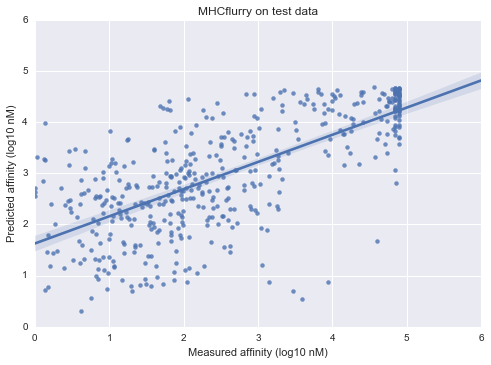

In [14]:
test_data = kim2014_test.get_allele("HLA-A3301")
predictions = new_model.predict(test_data.peptides)

seaborn.set_context('notebook')
seaborn.regplot(numpy.log10(test_data.affinities), numpy.log10(predictions))
pyplot.xlim(xmin=0)
pyplot.ylim(ymin=0)
pyplot.xlabel("Measured affinity (log10 nM)")
pyplot.ylabel("Predicted affinity (log10 nM)")
pyplot.title("MHCflurry on test data")

### Calculate AUC, F1, and Kendall's Tau scores

In [15]:
help(mhcflurry.class1_allele_specific.scoring.make_scores)

Help on function make_scores in module mhcflurry.class1_allele_specific.scoring:

make_scores(ic50_y, ic50_y_pred, sample_weight=None, threshold_nm=500, max_ic50=50000)
    Calculate AUC, F1, and Kendall Tau scores.
    
    Parameters
    -----------
    ic50_y : float list
        true IC50s (i.e. affinities)
    
    ic50_y_pred : float list
        predicted IC50s
    
    sample_weight : float list [optional]
    
    threshold_nm : float [optional]
    
    max_ic50 : float [optional]
    
    Returns
    -----------
    dict with entries "auc", "f1", "tau"



In [16]:
mhcflurry.class1_allele_specific.scoring.make_scores(test_data.affinities, predictions)

{'auc': 0.88567942942942945,
 'f1': 0.73814432989690715,
 'tau': 0.4912073299323329}

## Cross validation for hyperparameter selection

In [17]:
help(mhcflurry.class1_allele_specific.cross_validation.cross_validation_folds)

Help on function cross_validation_folds in module mhcflurry.class1_allele_specific.cross_validation:

cross_validation_folds(train_data, alleles=None, n_folds=3, drop_similar_peptides=False, imputer=None, impute_kwargs={'min_observations_per_allele': 2, 'min_observations_per_peptide': 2}, parallel_backend=None)
    Split a AffinityMeasurementDataset into n_folds cross validation folds for each allele,
    optionally performing imputation.
    
    Parameters
    -----------
    train_data : mhcflurry.AffinityMeasurementDataset
    
    alleles : string list, optional
        Alleles to run cross validation on. Default: all alleles in
        train_data.
    
    n_folds : int, optional
        Number of cross validation folds for each allele.
    
    drop_similar_peptides : boolean, optional
        For each fold, remove peptides from the test data that are similar
        to peptides in the train data. Similarity is defined as in the
        similar_peptides function.
    
    impute

In [18]:
folds = mhcflurry.class1_allele_specific.cross_validation.cross_validation_folds(train_data)
folds

[AlleleSpecificTrainTestFold(allele='HLA-A3301', train=AffinityMeasurementDataset(n=2026, alleles=['HLA-A3301']), imputed_train=None, test=AffinityMeasurementDataset(n=1014, alleles=['HLA-A3301'])),
 AlleleSpecificTrainTestFold(allele='HLA-A3301', train=AffinityMeasurementDataset(n=2027, alleles=['HLA-A3301']), imputed_train=None, test=AffinityMeasurementDataset(n=1013, alleles=['HLA-A3301'])),
 AlleleSpecificTrainTestFold(allele='HLA-A3301', train=AffinityMeasurementDataset(n=2027, alleles=['HLA-A3301']), imputed_train=None, test=AffinityMeasurementDataset(n=1013, alleles=['HLA-A3301']))]

In [19]:
# Take a look at what hyperparameters are available for searching over.
mhcflurry.class1_allele_specific.train.HYPERPARAMETER_DEFAULTS.defaults

{'activation': 'tanh',
 'batch_normalization': True,
 'batch_size': 128,
 'dropout_probability': 0.0,
 'embedding_output_dim': 32,
 'fraction_negative': 0.0,
 'impute': False,
 'init': 'glorot_uniform',
 'kmer_size': 9,
 'layer_sizes': [64],
 'loss': 'mse',
 'max_ic50': 50000.0,
 'n_training_epochs': 250,
 'optimizer': 'rmsprop',
 'output_activation': 'sigmoid',
 'pretrain_decay': 'numpy.exp(-epoch)'}

In [20]:
models_to_search = mhcflurry.class1_allele_specific.train.HYPERPARAMETER_DEFAULTS.models_grid(
    fraction_negative=[.1],
    layer_sizes=[[8], [12]])
print("Searching over %d models." % len(models_to_search))
print("First model: \n%s" % models_to_search[0])

Searching over 2 models.
First model: 
{'kmer_size': 9, 'n_training_epochs': 250, 'loss': 'mse', 'max_ic50': 50000.0, 'fraction_negative': 0.1, 'layer_sizes': [8], 'batch_size': 128, 'activation': 'tanh', 'init': 'glorot_uniform', 'dropout_probability': 0.0, 'pretrain_decay': 'numpy.exp(-epoch)', 'optimizer': 'rmsprop', 'impute': False, 'embedding_output_dim': 32, 'batch_normalization': True, 'output_activation': 'sigmoid'}


In [21]:
help(mhcflurry.class1_allele_specific.train.train_across_models_and_folds)

Help on function train_across_models_and_folds in module mhcflurry.class1_allele_specific.train:

train_across_models_and_folds(folds, model_descriptions, cartesian_product_of_folds_and_models=True, return_predictors=False, folds_per_task=1, parallel_backend=None)
    Train and optionally test any number of models across any number of folds.
    
    Parameters
    -----------
    folds : list of AlleleSpecificTrainTestFold
    
    model_descriptions : list of dict
        Models to test
    
    cartesian_product_of_folds_and_models : boolean, optional
        If true, then a predictor is treained for each fold and model
        description.
        If false, then len(folds) must equal len(model_descriptions), and
        the i'th model is trained on the i'th fold.
    
    return_predictors : boolean, optional
        Include the trained predictors in the result.
    
    parallel_backend : mhcflurry.parallelism.ParallelBackend, optional
        Futures implementation to use for run

In [22]:
results_df = mhcflurry.class1_allele_specific.train.train_across_models_and_folds(
    folds,
    models_to_search,
    return_predictors=True)
results_df

,allele,fold_num,model_num,train_size,test_size,imputed_train_size,train_tau,train_f1,train_auc,test_tau,...,model_batch_size,model_activation,model_init,model_dropout_probability,model_pretrain_decay,model_optimizer,model_impute,model_embedding_output_dim,model_batch_normalization,model_output_activation
0,HLA-A3301,0,0,2026,1014,None,0.705331,0.887640,0.988062,0.408410,...,128,tanh,glorot_uniform,0.0,numpy.exp(-epoch),rmsprop,False,32,True,sigmoid
1,HLA-A3301,0,1,2026,1014,None,0.743330,0.907407,0.994428,0.425253,...,128,tanh,glorot_uniform,0.0,numpy.exp(-epoch),rmsprop,False,32,True,sigmoid
2,HLA-A3301,1,0,2027,1013,None,0.698517,0.877470,0.990193,0.434371,...,128,tanh,glorot_uniform,0.0,numpy.exp(-epoch),rmsprop,False,32,True,sigmoid
3,HLA-A3301,1,1,2027,1013,None,0.745956,0.874227,0.994672,0.444289,...,128,tanh,glorot_uniform,0.0,numpy.exp(-epoch),rmsprop,False,32,True,sigmoid
4,HLA-A3301,2,0,2027,1013,None,0.703742,0.859961,0.988574,0.440792,...,128,tanh,glorot_uniform,0.0,numpy.exp(-epoch),rmsprop,False,32,True,sigmoid
5,HLA-A3301,2,1,2027,1013,None,0.741095,0.912801,0.993722,0.443505,...,128,tanh,glorot_uniform,0.0,numpy.exp(-epoch),rmsprop,False,32,True,sigmoid


In [23]:
# The trained predictors are in the 'predictor' column
results_df.predictor

0    Class1BindingPredictor(name=None, max_ic50=500...
1    Class1BindingPredictor(name=None, max_ic50=500...
2    Class1BindingPredictor(name=None, max_ic50=500...
3    Class1BindingPredictor(name=None, max_ic50=500...
4    Class1BindingPredictor(name=None, max_ic50=500...
5    Class1BindingPredictor(name=None, max_ic50=500...
Name: predictor, dtype: object

In [24]:
# Which model had the best average AUC across folds?
results_df.groupby("model_num").test_auc.mean()

model_num
0    0.841541
1    0.849979
Name: test_auc, dtype: float64